 # <font color='red'><center>Classification of Airline Passenger Satisfaction</center><font>




###  <font color='blue'>Introduction</font>
##### To improve the airline's services, it's necessary to analyze customer satisfaction. That's why we need to study the factors affecting satisfaction


### <font color='blue'>Project's goals</font>

#### Does Personal or Business customer  more  satisfied?
#### Are women or men more dissatisfied with airline services?
#### Which class is more dissatisfied?
#### From all customer records, how many are considered loyal customers of the airline company?
#### How satisfied are customers with food services?
####  How much  do they  satisfy  inflight?
#### Does Arrival /Departure Delay in Minutes affect their satisfaction?
#### are their Seat  comfort?
#### Create a performant model of customers satisfaction classification?



###  <font color='blue'>Data Description</font>
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

###  <font color='blue'>Import libraries</font>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from scipy.stats import chi2_contingency 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_curve, auc, confusion_matrix, classification_report)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import  GridSearchCV

###  <font color='blue'>Load Data</font>

In [39]:
#fusion data for analysis
airline_df_1=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
airline_df_2=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/test.csv')
airlin_df=pd.concat([airline_df_1,airline_df_2],axis=0)

In [40]:
#show first rows
airlin_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [41]:
# how much rows we have
print("the number of rows is ",airlin_df.size)

the number of rows is  3247000


###  <font color='blue'>Data Wrangling</font>

In [42]:
print("there is any missing values?",airlin_df.isna().sum())


there is any missing values? Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes    

As we have too much rows,we can just remove those 393 rows with missing values

In [43]:
 # remove missing values
airlin_df=airlin_df.dropna()
#reverify missing values
print("there is any missing values ,Now?",airlin_df.isna().sum())

there is any missing values ,Now? Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                  

In [44]:
# verify duplicated values
print("there is duplicated rows?",airlin_df.duplicated().sum())

there is duplicated rows? 0


In [45]:
# verify Data types
print("What are columns  data types?",airlin_df.dtypes)

What are columns  data types? Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness              

In [46]:
#Capitalize categoriels values to avoid any confusion 
for col in airlin_df.columns:
    if airlin_df[col].dtype=="object":
        airlin_df[col]=airlin_df[col].str.capitalize()


### <font color="violet">Does  Business customer more satisfied?</font>
### <font color="violet"> Which class is more dissatisfied?</font>


</font>

Text(0.5, 1.0, 'Distribution of satisfaction on Gender')

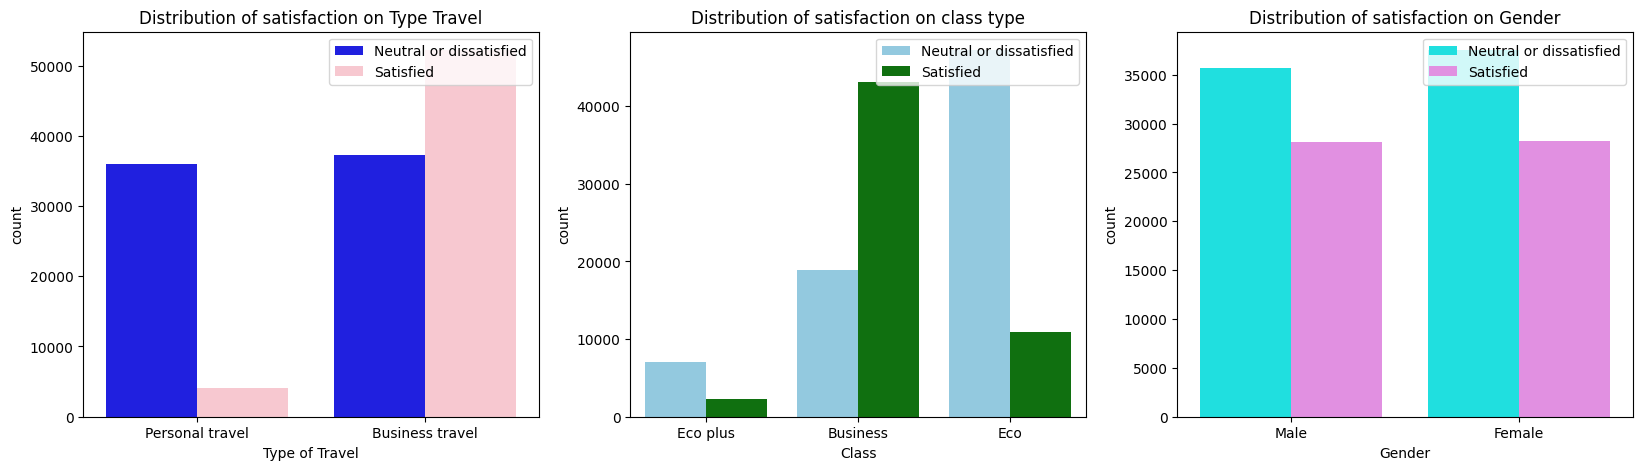

In [47]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.countplot(data=airlin_df, x='Type of Travel', hue='satisfaction',palette=['blue','pink'])
plt.legend(loc='upper right')
plt.title('Distribution of satisfaction on Type Travel')
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,3,2)
sns.countplot(data=airlin_df, x='Class', hue='satisfaction',palette=['skyblue','green'])
plt.legend(loc='upper right')
plt.title('Distribution of satisfaction on class type')
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,3,3)
sns.countplot(data=airlin_df, x='Gender', hue='satisfaction',palette=['aqua','violet'])
plt.legend(loc='upper right')
plt.title('Distribution of satisfaction on Gender')

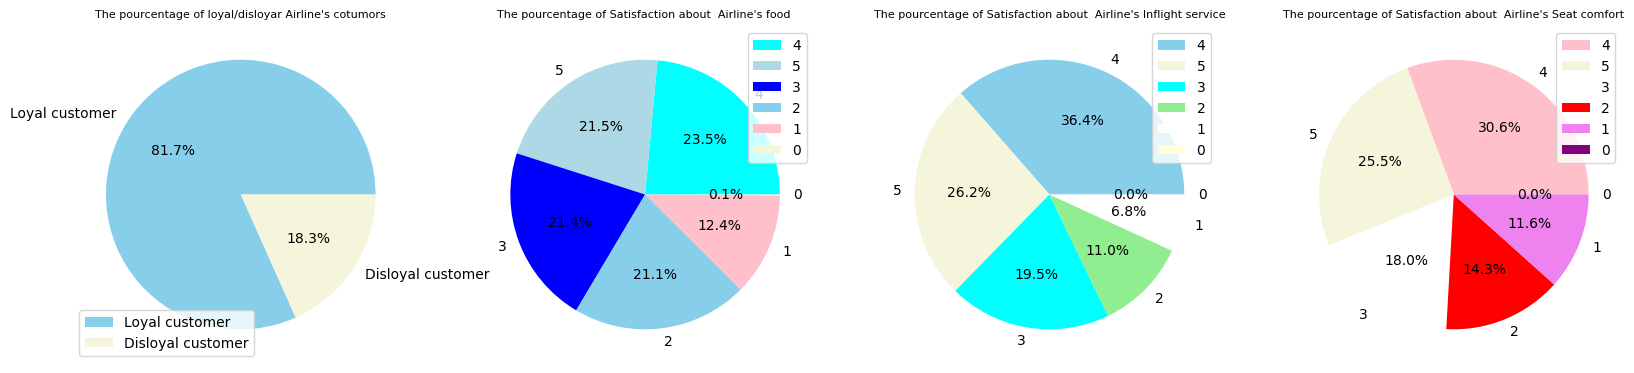

In [48]:
#convert to numerical values :effectifs
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)

customerType = airlin_df['Customer Type'].value_counts()
plt.pie(customerType,labels=customerType.index,colors=['skyblue','beige'] ,autopct='%1.1f%%')
plt.legend()
plt.title("The pourcentage of loyal/disloyar Airline's cotumors",fontsize=8)
plt.subplots_adjust(hspace=0.4)
plt.subplot(1,4,2)
food_score=airlin_df['Food and drink'].value_counts()
plt.pie(food_score,labels=food_score.index,colors=['aqua','lightblue','blue','skyblue','pink','beige'],autopct='%1.1f%%')
plt.legend()#,bbox_to_anchor=(1, 0)
plt.title("The pourcentage of Satisfaction about  Airline's food ",fontsize=8)
plt.subplots_adjust(hspace=0.4)
plt.subplot(1,4,3)
Inflight_service_Score=airlin_df['Inflight service'].value_counts()
plt.pie(Inflight_service_Score,labels=Inflight_service_Score.index,colors=['skyblue','beige','aqua','lightgreen','white','lightyellow'] ,autopct='%1.1f%%')
plt.legend()
plt.title("The pourcentage of Satisfaction about  Airline's Inflight service",fontsize=8)
plt.subplots_adjust(hspace=0.4)
plt.subplot(1,4,4)
Seat_comfort_Score=airlin_df['Seat comfort'].value_counts()
plt.pie(Seat_comfort_Score,labels=Seat_comfort_Score.index,colors=['pink','beige','white','red','violet','purple'] ,autopct='%1.1f%%')
plt.legend()
plt.title("The pourcentage of Satisfaction about  Airline's Seat comfort",fontsize=8)

plt.show()
 

#### <font color='violet'>Does Arrival /Departure Delay in Minutes affect their satisfaction?</font>

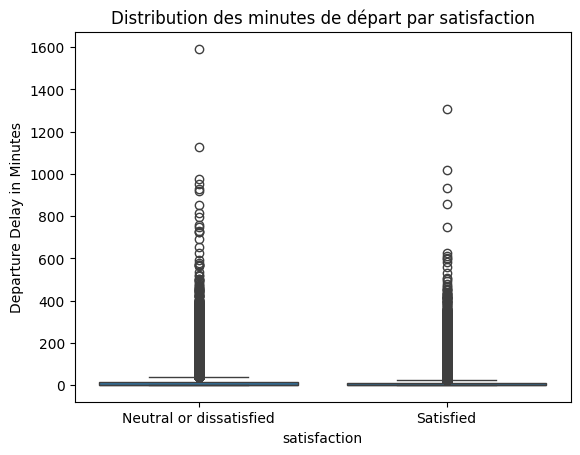

In [49]:
sns.boxplot(x='satisfaction',y='Departure Delay in Minutes',data=airlin_df)
plt.title('Distribution des minutes de départ par satisfaction')
plt.show()

###  <font color='blue'>Features Engineering</font>

In [50]:
# drop unutil features
airlin_df=airlin_df.drop(['Unnamed: 0','id'],axis=1)


In [51]:
# show 
airlin_df.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal customer,13,Personal travel,Eco plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,Neutral or dissatisfied
1,Male,Disloyal customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,Neutral or dissatisfied


<Axes: >

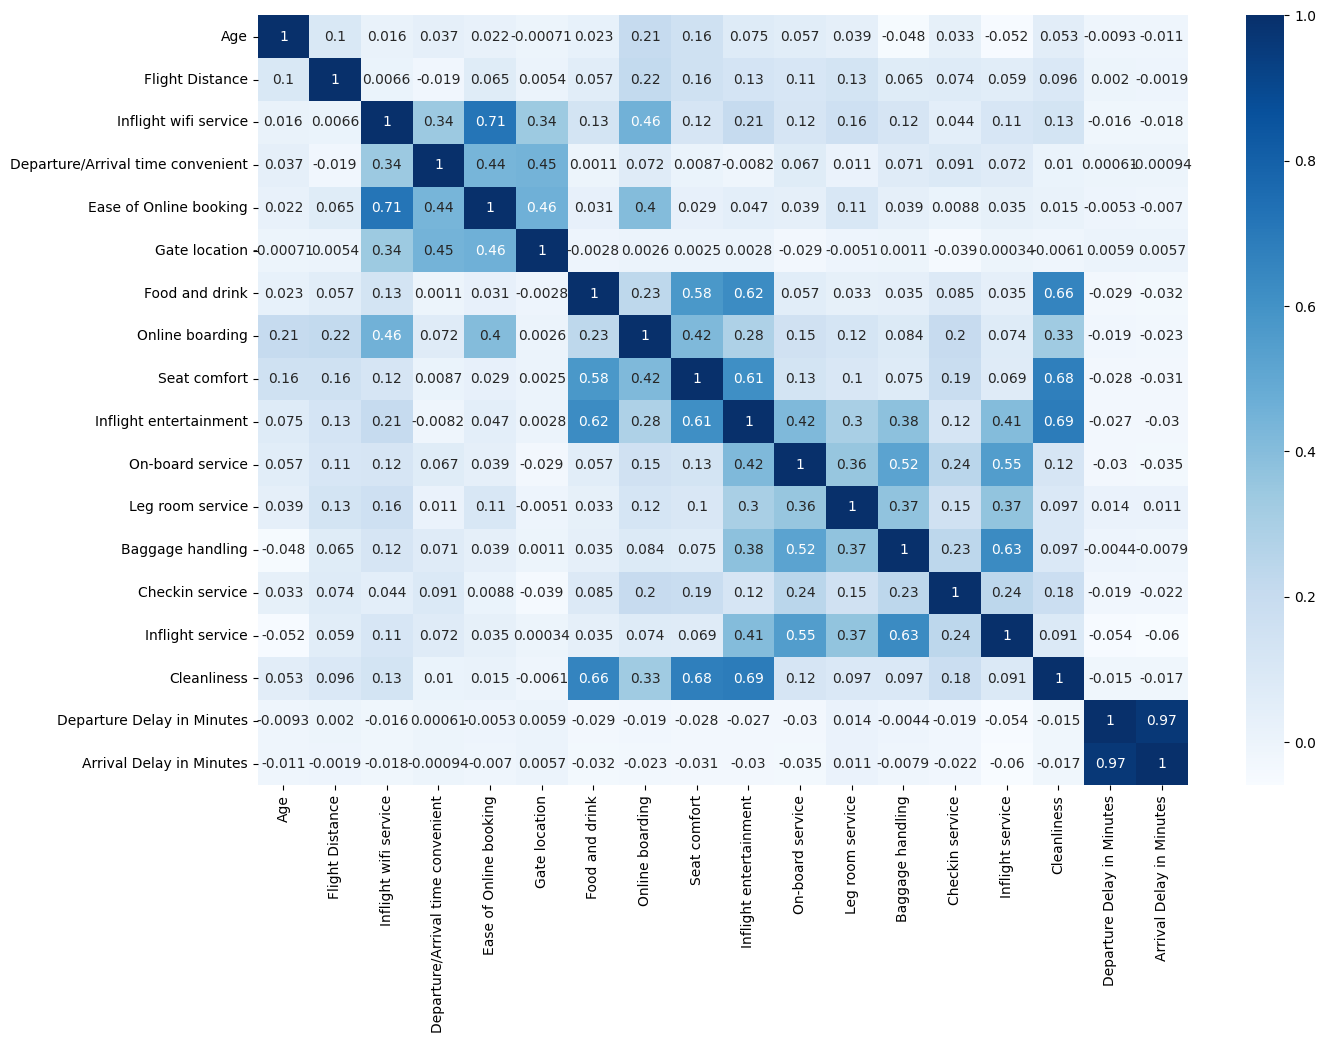

In [52]:
#verify correlation ON continous features
conti_fieatures=airlin_df.iloc[0:,[2] + list(range(5, 22))]
corre_f_c=conti_fieatures.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corre_f_c,cmap='Blues',annot=True)

**Some features may exhibit multicollinearity. For the departure and arrival delays, we will transform them into a single feature, termed 'total delay.' For other features, we will utilize Lasso regression to mitigate the risk of overfitting, particularly in logistic regression, which is sensitive to multicollinearity.**

In [53]:
# Total delay
airlin_df['Total_Delay']=airlin_df['Departure Delay in Minutes']+airlin_df['Arrival Delay in Minutes']
airlin_df=airlin_df.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)

In [54]:
#show
airlin_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Total_Delay
0,Male,Loyal customer,13,Personal travel,Eco plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,Neutral or dissatisfied,43.0


In [55]:
# contigence table
contigence_table1=pd.crosstab(airlin_df['satisfaction'],airlin_df['Gender'])
contigence_table2=pd.crosstab(airlin_df['satisfaction'],airlin_df['Customer Type'])
contigence_table3=pd.crosstab(airlin_df['satisfaction'],airlin_df['Type of Travel'])
contigence_table4=pd.crosstab(airlin_df['satisfaction'],airlin_df['Class'])
khi21, pval1 , ddl1 , contingent_theorique1=chi2_contingency(contigence_table1)
khi22, pval2 , ddl2 , contingent_theorique2=chi2_contingency(contigence_table2)
khi23, pval3 , ddl3 , contingent_theorique3=chi2_contingency(contigence_table3)
khi24, pval4 , ddl4 , contingent_theorique4=chi2_contingency(contigence_table4)
data={'gender vs Satisfaction':pval1,'Customer Type':pval2,"type of Travel":pval3,"Class":pval4}
data

{'gender vs Satisfaction': 3.608854694610591e-05,
 'Customer Type': 0.0,
 'type of Travel': 0.0,
 'Class': 0.0}

**As the p-values for the four categorical features are less than 0.05, we can reject the null hypothesis, which states that the Satisfaction variable and each of the four features are independent.**

In [56]:
#contruct numerical  data version for logistic  regression 
# Gender column
lab= LabelEncoder()
Gender_numerical=lab.fit_transform(airlin_df['Gender'])
# As Customer Type  is nominal with 2 values ,we can use LabelEncoder also
Cos_TYpe=lab.fit_transform(airlin_df['Customer Type'])
# Type of travel encoding
trv_type=lab.fit_transform(airlin_df['Type of Travel'])
#ordinal var
ordinal = OrdinalEncoder()
ordinal.fit(np.asarray(airlin_df['Class']).reshape(-1,1))
classe=ordinal.transform(np.asarray(airlin_df['Class']).reshape(-1,1))
#from array to list
classe=classe.flatten()
classe=list(classe)
# construt new version of data which is numeric
df=pd.DataFrame({'Gender':Gender_numerical,"Customer Type":Cos_TYpe,"Type of Travel":trv_type,"Class of travel":classe,"Age" :airlin_df['Age']})
df_ver2=pd.concat([df,airlin_df.iloc[0:,5:21],airlin_df['Total_Delay']],axis=1)
#target encod
y=lab.fit_transform(airlin_df['satisfaction'])
df_ver2=df_ver2.drop('satisfaction',axis=1)

In [57]:

df_ver2.head()

,Gender,Customer Type,Type of Travel,Class of travel,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total_Delay
0,1,1,1,2.0,13,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,43.0
1,1,0,0,0.0,25,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,7.0
2,0,1,0,0.0,26,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,0.0
3,0,1,0,0.0,25,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,20.0
4,1,1,0,0.0,61,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,0.0


In [58]:
#Count target class 
countes_classes=airlin_df['satisfaction'].value_counts()
countes_classes

satisfaction
Neutral or dissatisfied    73225
Satisfied                  56262
Name: count, dtype: int64

In [59]:
airlin_df.size

2848714

In [60]:
#split data into train and test

X_train,X_test,y_train,y_test=train_test_split(df_ver2,y,test_size=0.2,random_state=42)

**It is definitely clear that the majority of our features do not follow a normal distribution, so we will use normalization**

In [61]:
#Normalisation features
X_train=normalize(X_train)
X_test=normalize(X_test)

###  <font color='blue'> Model 1: Logistic Regression</font>

In [62]:
# train model
LR=LogisticRegression(class_weight= 'balanced')
LR.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

**As our data are imbalanced, we won't base our evaluation solely on accuracy. Instead, we will focus on the AUC (Area Under the Curve) for the ROC (Receiver Operating Characteristic) curve and F1-score. We will also consider other important metrics such as recall and precision to ensure a comprehensive evaluation of our model's performance.**

In [63]:

def evaluate(X,reel,LR):
  #Evaluate
  predicted=LR.predict(X)
  y_scores = LR.predict_proba(X)[:, 1]  # Probabilités pour la classe positive
  accuracy = accuracy_score(reel,predicted)
  precision = precision_score(reel,predicted)
  recall = recall_score(reel,predicted)
  f1 = f1_score(reel,predicted)
  cm = confusion_matrix(reel,predicted)


  fpr, tpr, thresholds = roc_curve(reel, y_scores)
  roc_auc = auc(fpr, tpr)

  print(f'Accuracy: {accuracy:.2f}')
  print(f'Precision: {precision:.2f}')
  print(f'Recall: {recall:.2f}')
  print(f'F1 Score: {f1:.2f}')
  print('Confusion Matrix:')
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['neutral or dissatisfied', 'satisfied'])
  cm_display.plot(cmap='Blues')
  plt.show()
  print(classification_report(reel, predicted))

#ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='red', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Taux de Faux Positifs')
  plt.ylabel('Taux de Vrais Positifs')
  plt.title('Courbe ROC')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

Accuracy: 0.62
Precision: 0.54
Recall: 0.81
F1 Score: 0.65
Confusion Matrix:


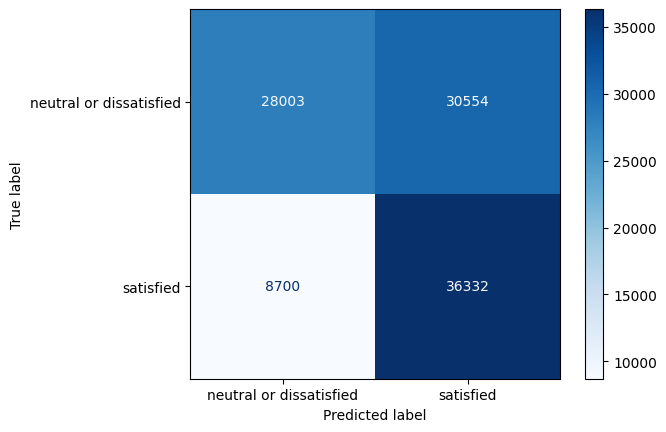

              precision    recall  f1-score   support

           0       0.76      0.48      0.59     58557
           1       0.54      0.81      0.65     45032

    accuracy                           0.62    103589
   macro avg       0.65      0.64      0.62    103589
weighted avg       0.67      0.62      0.61    103589



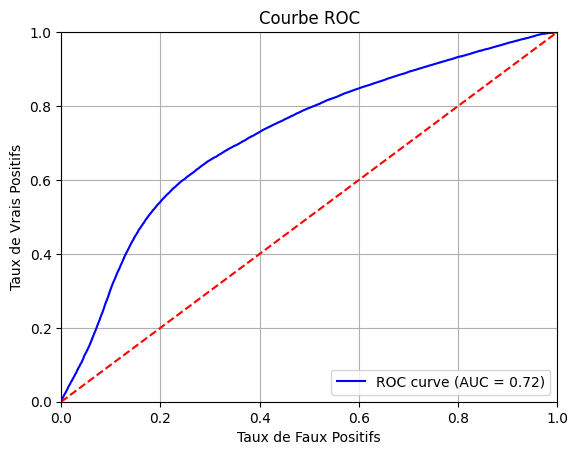

In [64]:
# train evaluate
evaluate(X_train,y_train,LR)

Accuracy: 0.62
Precision: 0.54
Recall: 0.81
F1 Score: 0.65
Confusion Matrix:


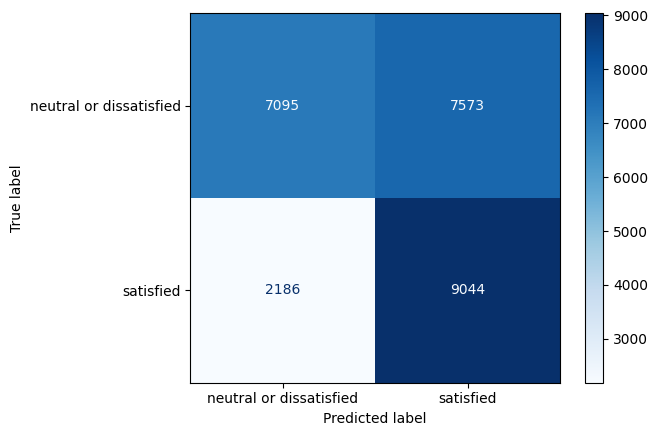

              precision    recall  f1-score   support

           0       0.76      0.48      0.59     14668
           1       0.54      0.81      0.65     11230

    accuracy                           0.62     25898
   macro avg       0.65      0.64      0.62     25898
weighted avg       0.67      0.62      0.62     25898



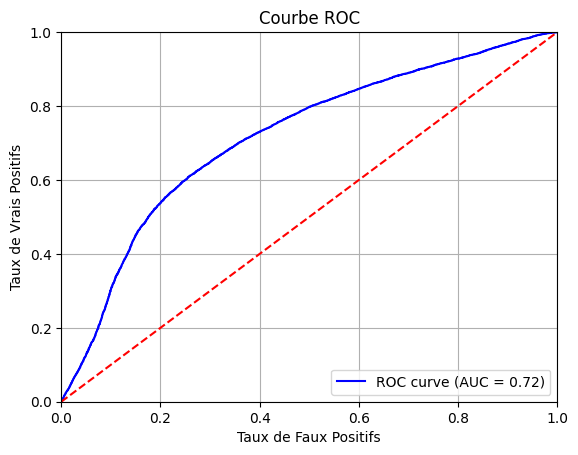

In [65]:
evaluate(X_test,y_test,LR)

###  <font color='blue'> Model 2: Logistic Regression With LASSO Regularization</font>

In [66]:
#Balaced technique for Imbalnced class :it's inched weight of minority classes
log_clf = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1',solver='saga') # saga optimizer "l1 lasso for features selection"
log_clf.fit(X_train,y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='saga')

Accuracy: 0.72
Precision: 0.63
Recall: 0.85
F1 Score: 0.72
Confusion Matrix:


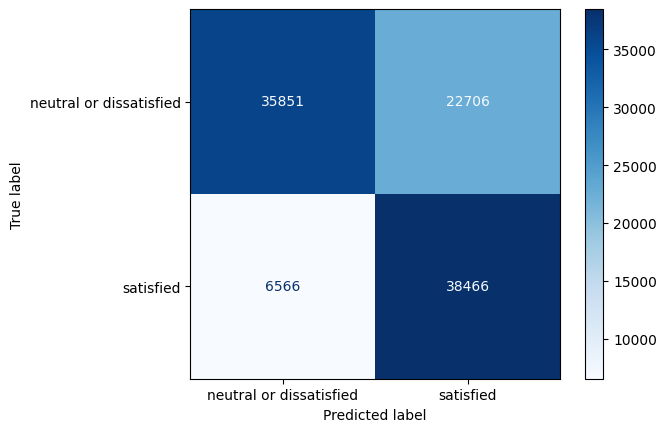

              precision    recall  f1-score   support

           0       0.85      0.61      0.71     58557
           1       0.63      0.85      0.72     45032

    accuracy                           0.72    103589
   macro avg       0.74      0.73      0.72    103589
weighted avg       0.75      0.72      0.72    103589



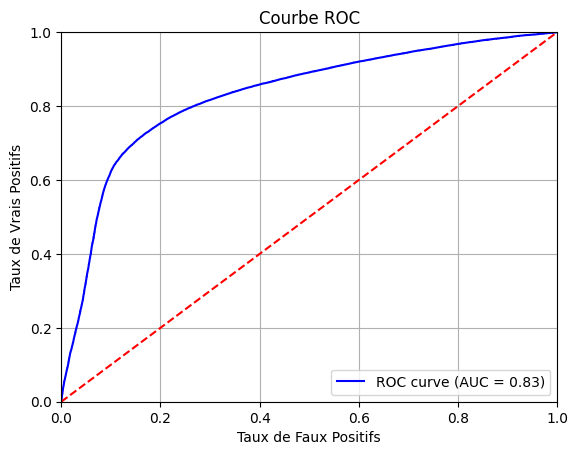

In [67]:
#evaluate for train"
evaluate(X_train,y_train,log_clf)

Accuracy: 0.72
Precision: 0.63
Recall: 0.86
F1 Score: 0.73
Confusion Matrix:


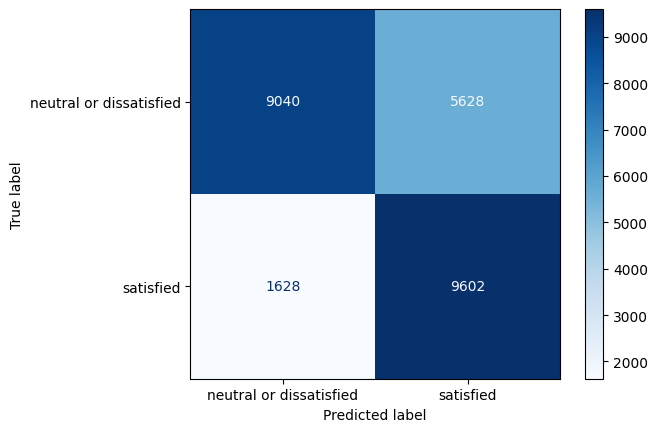

              precision    recall  f1-score   support

           0       0.85      0.62      0.71     14668
           1       0.63      0.86      0.73     11230

    accuracy                           0.72     25898
   macro avg       0.74      0.74      0.72     25898
weighted avg       0.75      0.72      0.72     25898



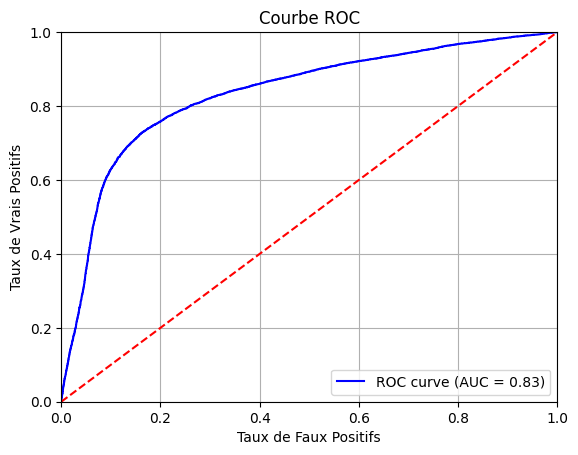

In [68]:
#evaluate for test
evaluate(X_test,y_test,log_clf)


###  <font color='blue'> Model 3: Decision Tree</font>

In [69]:
clf_gini= DecisionTreeClassifier(criterion='gini',max_depth=10)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

Accuracy: 0.91
Precision: 0.89
Recall: 0.91
F1 Score: 0.90
Confusion Matrix:


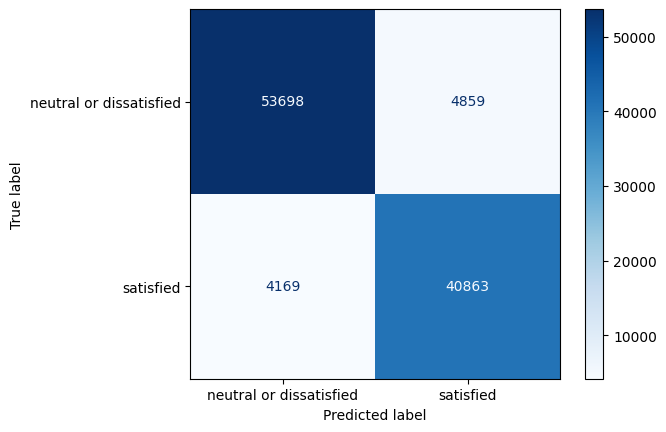

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     58557
           1       0.89      0.91      0.90     45032

    accuracy                           0.91    103589
   macro avg       0.91      0.91      0.91    103589
weighted avg       0.91      0.91      0.91    103589



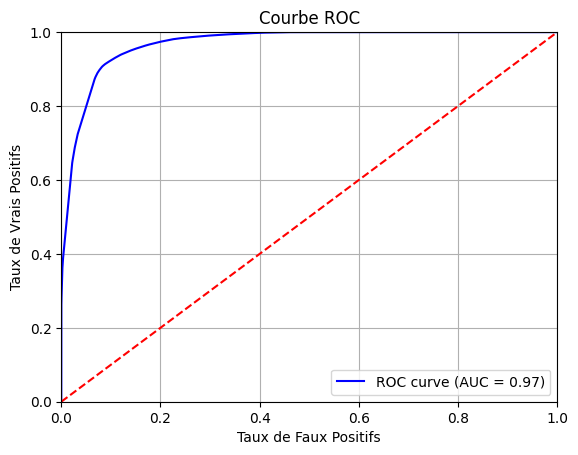

In [70]:
#Predict the values  on train
evaluate(X_train,y_train,clf_gini)

Accuracy: 0.90
Precision: 0.88
Recall: 0.90
F1 Score: 0.89
Confusion Matrix:


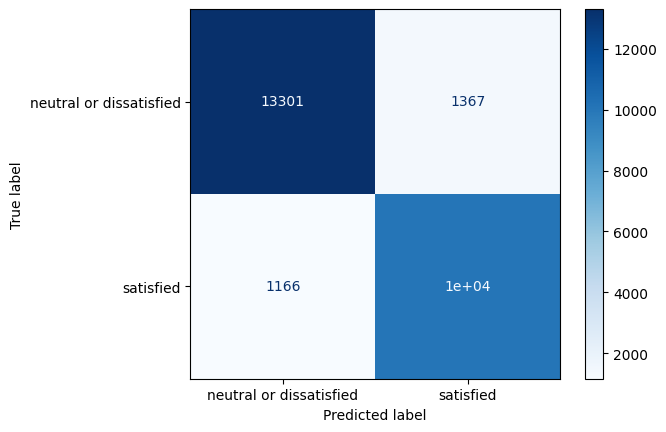

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     14668
           1       0.88      0.90      0.89     11230

    accuracy                           0.90     25898
   macro avg       0.90      0.90      0.90     25898
weighted avg       0.90      0.90      0.90     25898



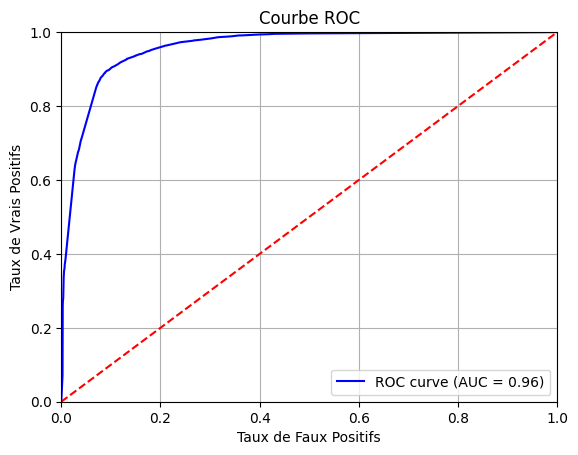

In [71]:
#Predict the values  on test
evaluate(X_test,y_test,clf_gini)

###  <font color='blue'> Conclusion</font>

| **Modèle**                          | **Accuracy** | **Precision** | **Recall** | **F1 Score** | **AUC** |
|-------------------------------------|--------------|---------------|------------|--------------|---------|
| **Régression Logistique**            | 0.62         | 0.54          | 0.81       | 0.65         | 0.72    |
| **Régression Logistique avec Lasso** | 0.72         | 0.63          | 0.86       | 0.73         | 0.83    |
| **Arbre de Décision (Critère Gini)** | 0.90         | 0.88          | 0.90       | 0.89         | 0.96    |
